Libraries



In [301]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline

from sklearn.model_selection import train_test_split



Import Data

In [302]:
# I'm Going to import Adult dataset from UCI , we need to define the columns first. 

columns = [
    'Age', 'Workclass', 'FinalWeight', 'Education',
    'Education_Num','Marital_Status', 'Ocupation',
    'Relationship','Race','Sex','Capital-Gain',
    'Capital-Loss','Hours-Per-Week', 'Native-Country','Income'
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None,
                  names=columns, skipinitialspace=True, na_values="?")

df



,Age,Workclass,FinalWeight,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Exploring Data

In [303]:
df.info()
#workclass, ocupation, native country has missing values. We will handle them later in our pipeline.
#Since our label income doesnt has any missing values i will change it to binary right away.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   FinalWeight     32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Ocupation       30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-Gain    32561 non-null  int64 
 11  Capital-Loss    32561 non-null  int64 
 12  Hours-Per-Week  32561 non-null  int64 
 13  Native-Country  31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [304]:
df['Income'] = df['Income'].apply(
    lambda x: 0 if x.strip() == "<=50K" else (1 if x.strip() == ">50K" else np.nan)
)
df['Income'].value_counts()

Income
0    24720
1     7841
Name: count, dtype: int64

In [305]:
df.describe()

,Age,FinalWeight,Education_Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [306]:
df.describe(include=['O'])

,Workclass,Education,Marital_Status,Ocupation,Relationship,Race,Sex,Native-Country
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [307]:
df.columns

Index(['Age', 'Workclass', 'FinalWeight', 'Education', 'Education_Num',
       'Marital_Status', 'Ocupation', 'Relationship', 'Race', 'Sex',
       'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country',
       'Income'],
      dtype='object')

In [308]:
df.groupby('Age',as_index= False)['Income'].mean()
#I will seperate ages as groups.

,Age,Income
0,17,0.000000
1,18,0.000000
2,19,0.002809
3,20,0.000000
4,21,0.004167
...,...,...
68,85,0.000000
69,86,0.000000
70,87,0.000000
71,88,0.000000


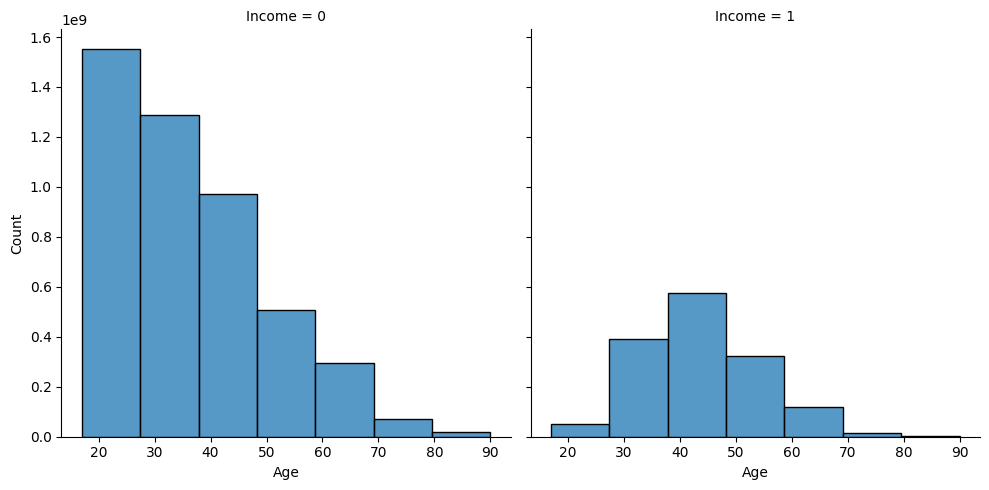

In [309]:
sns.displot(df , x='Age', col = 'Income', binwidth = 10, height=5, weights='FinalWeight')

In [310]:
bins = [0,18,35,65,100]
labels = ["Child","Young Working Age","Old Working Age", "Retired"]
df['Age_Groups'] = pd.cut(df['Age'],bins=bins,labels=labels,right=False)
df.groupby('Age_Groups', as_index=False)['Income'].mean()
#this way we will see the effect of age on income more clearly 

C:\Users\zero_\AppData\Local\Temp\ipykernel_35928\4232818537.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Groups', as_index=False)['Income'].mean()


,Age_Groups,Income
0,Child,0.000000
1,Young Working Age,0.108979
2,Old Working Age,0.353808
3,Retired,0.206587


In [311]:
df.head()

,Age,Workclass,FinalWeight,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Age_Groups
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Old Working Age
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Old Working Age
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Old Working Age
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Old Working Age
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Young Working Age


In [312]:
dfWithWeight = df
df = df.drop('FinalWeight', axis=1)
df.head()

,Age,Workclass,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Age_Groups
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Old Working Age
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Old Working Age
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Old Working Age
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Old Working Age
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Young Working Age


In [313]:
print(df[['Education','Education_Num']].drop_duplicates().sort_values('Education_Num'))

        Education  Education_Num
224     Preschool              1
160       1st-4th              2
56        5th-6th              3
15        7th-8th              4
6             9th              5
77           10th              6
3            11th              7
415          12th              8
2         HS-grad              9
10   Some-college             10
14      Assoc-voc             11
13     Assoc-acdm             12
0       Bachelors             13
5         Masters             14
52    Prof-school             15
20      Doctorate             16


In [314]:
df.groupby('Education_Num',as_index=False)['Income'].mean()
#clearly as education goes up income also goes up but its not really linear so i will group them.

,Education_Num,Income
0,1,0.000000
1,2,0.035714
2,3,0.048048
3,4,0.061920
4,5,0.052529
5,6,0.066452
6,7,0.051064
7,8,0.076212
8,9,0.159509
9,10,0.190235


In [315]:
edu_map = { 1: 'Low_Edu', 2: 'Low_Edu', 3: 'Low_Edu', 4: 'Low_Edu', 5: 'Low_Edu', 6: 'Low_Edu', 7: 'Low_Edu', 8: 'Low_Edu', 9: 'Mid_Edu',
            10: 'Mid_Edu', 11: 'Mid_Edu', 12: 'Mid_Edu', 13: 'High_Edu', 14: 'High_Edu', 15: 'Higher_Edu', 16: 'Higher_Edu'}
df['Edu_Group'] = df['Education_Num'].map(edu_map)
df.groupby('Edu_Group',as_index=False)['Income'].mean().sort_values('Income')
#with this education grade seperation we can more clearly see the effect of the education grade over the income, more education means more income

,Edu_Group,Income
2,Low_Edu,0.057371
3,Mid_Edu,0.182204
0,High_Edu,0.449279
1,Higher_Edu,0.737108


In [316]:
df.head()

,Age,Workclass,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Age_Groups,Edu_Group
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Old Working Age,High_Edu
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Old Working Age,High_Edu
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Old Working Age,Mid_Edu
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Old Working Age,Low_Edu
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Young Working Age,High_Edu


In [317]:
df.groupby('Marital_Status', as_index=False)['Income'].mean()
#It seems like married couples that lives together has a higher chance of higher income so ill group them as one.

,Marital_Status,Income
0,Divorced,0.104209
1,Married-AF-spouse,0.434783
2,Married-civ-spouse,0.446848
3,Married-spouse-absent,0.081340
4,Never-married,0.045961
5,Separated,0.064390
6,Widowed,0.085599


In [318]:
marital_map = { "Married-AF-spouse" : "Married-Together","Married-civ-spouse" : "Married-Together","Married-spouse-absent" : "Married-Alone",
               "Never-married" : "Alone","Separated" : "Alone","Widowed" : "Alone", "Divorced":"Divorced"
               }
df['Marital_Groupped'] = df['Marital_Status'].map(marital_map)
df.groupby('Marital_Groupped',as_index=False)['Income'].mean()
#Now we can see the relavence of marital status and income more clearly. 


,Marital_Groupped,Income
0,Alone,0.050547
1,Divorced,0.104209
2,Married-Alone,0.081340
3,Married-Together,0.446830


In [319]:
df.head()
#now lets look at the occupation 

,Age,Workclass,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Age_Groups,Edu_Group,Marital_Groupped
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Old Working Age,High_Edu,Alone
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Old Working Age,High_Edu,Married-Together
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Old Working Age,Mid_Edu,Divorced
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Old Working Age,Low_Edu,Married-Together
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Young Working Age,High_Edu,Married-Together


In [320]:
df.groupby('Ocupation', as_index= False)['Income'].mean()
#I can see that worker class gets less money and executives has more income but i feel like grouping them as that would not really be a good choice 
#since for example a high rank army worker gets a lot more than a lower rank one but this dataset sees them both as armed-forces.

,Ocupation,Income
0,Adm-clerical,0.134483
1,Armed-Forces,0.111111
2,Craft-repair,0.226641
3,Exec-managerial,0.484014
4,Farming-fishing,0.115694
5,Handlers-cleaners,0.062774
6,Machine-op-inspct,0.124875
7,Other-service,0.041578
8,Priv-house-serv,0.006711
9,Prof-specialty,0.449034


In [321]:
#now lets look at the relationship
df.groupby('Relationship', as_index= False)['Income'].mean()
#I dont know why does this dataset has this column because it really gives the same information as martial_status.
#I won't drop it for now but i won't work on it as well

,Relationship,Income
0,Husband,0.448571
1,Not-in-family,0.103070
2,Other-relative,0.037717
3,Own-child,0.013220
4,Unmarried,0.063262
5,Wife,0.475128


In [322]:
df.groupby('Race', as_index=False)['Income'].mean()
#Nothing to work on it for now

,Race,Income
0,Amer-Indian-Eskimo,0.115756
1,Asian-Pac-Islander,0.265640
2,Black,0.123880
3,Other,0.092251
4,White,0.255860


In [323]:
df.groupby('Sex', as_index=False)['Income'].mean()
#Nothing to work on it for now as well

,Sex,Income
0,Female,0.109461
1,Male,0.305737


In [324]:
df.groupby('Capital-Gain', as_index=False)['Income'].mean()
# We have capital-gain and capital-lose which are the individuals yearly lose or gain from an asset that he bought and sold.
# So i will make a capital-net to make them one column and i will bin that capital-net.

,Capital-Gain,Income
0,0,0.206506
1,114,0.000000
2,401,0.000000
3,594,0.000000
4,914,0.000000
...,...,...
114,25236,1.000000
115,27828,1.000000
116,34095,0.000000
117,41310,0.000000


In [325]:
df['Capital-Net'] = df['Capital-Gain'] - df['Capital-Loss']

In [326]:
df.groupby('Capital-Net' ,as_index= False)['Income'].mean().sort_values('Capital-Net')

,Capital-Net,Income
0,-4356,0.0
1,-3900,0.0
2,-3770,0.0
3,-3683,0.5
4,-3004,1.0
...,...,...
205,25236,1.0
206,27828,1.0
207,34095,0.0
208,41310,0.0


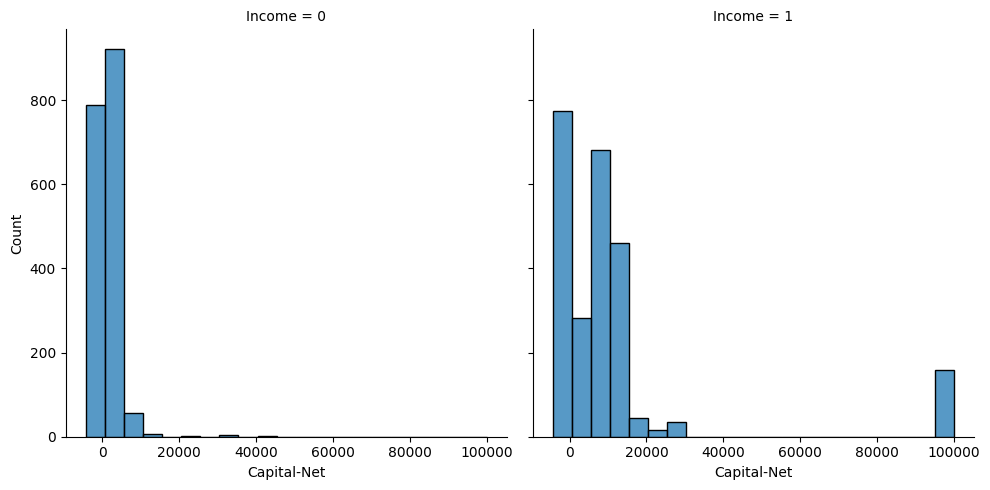

In [327]:
sns.displot(
    df[df["Capital-Net"] != 0], 
    x="Capital-Net", 
    col="Income", 
    binwidth=5000, 
    height=5
)
#I filtered out the 0 because there are thousands of 0
#This plot shows that capital net and income doesnt really have a lineerity at least for this dataset. 
# Maybe we can bound it with other features and get some good information out of them but i won't do that for this(I'm starting to loose my interest on this dataset).

In [328]:
df['Capital-Net-Log'] = np.log1p(df['Capital-Net'].clip(lower=0))
bins = [0,5,9,15]
labels = ['Low-Net','Middle_Net','High_Net']
df['Capital-Net-Log-Groupped'] = pd.cut(df['Capital-Net-Log'],bins = bins, labels=labels, include_lowest=True)
df.groupby('Capital-Net-Log-Groupped',as_index=False)['Income'].mean()
#It's clear that 98% is too good to be true. 
# It came out like that because there are very few people in high net category 
# in this dataset in fact there are only 3 or someting so it's unrelaible. 
#Columns related to capital are great to predict outliers especially rich people and we can fix the problems with different binning methods
#  but since this project is only for practice i won't be doing that and i will drop those columns.

C:\Users\zero_\AppData\Local\Temp\ipykernel_35928\3301239060.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Capital-Net-Log-Groupped',as_index=False)['Income'].mean()


,Capital-Net-Log-Groupped,Income
0,Low-Net,0.206465
1,Middle_Net,0.452830
2,High_Net,0.983549


In [329]:
originalDf = df.copy()
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_Num', 'Marital_Status',
       'Ocupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain',
       'Capital-Loss', 'Hours-Per-Week', 'Native-Country', 'Income',
       'Age_Groups', 'Edu_Group', 'Marital_Groupped', 'Capital-Net',
       'Capital-Net-Log', 'Capital-Net-Log-Groupped'],
      dtype='object')

In [330]:
df = df.drop(['Capital-Gain', 'Capital-Loss', 'Capital-Net', 'Capital-Net-Log', 'Capital-Net-Log-Groupped'], axis= 1)

In [331]:
originalDf.head()


,Age,Workclass,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Age_Groups,Edu_Group,Marital_Groupped,Capital-Net,Capital-Net-Log,Capital-Net-Log-Groupped
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Old Working Age,High_Edu,Alone,2174,7.684784,Middle_Net
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Old Working Age,High_Edu,Married-Together,0,0.000000,Low-Net
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Old Working Age,Mid_Edu,Divorced,0,0.000000,Low-Net
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Old Working Age,Low_Edu,Married-Together,0,0.000000,Low-Net
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Young Working Age,High_Edu,Married-Together,0,0.000000,Low-Net


In [332]:
df['Native-Country'].value_counts(normalize=True) * 100
#With normalizing and then multiplying it with 100 we can see how much of a percantage of every native country has on this data.
#It's clear that 90 percent of this dataset has US as their native country so its not really relaible
#  instead of droppping it i will group it as US and other.



Native-Country
United-States                 91.218963
Mexico                         2.010757
Philippines                    0.619176
Germany                        0.428420
Canada                         0.378385
Puerto-Rico                    0.356495
El-Salvador                    0.331478
India                          0.312715
Cuba                           0.297079
England                        0.281443
Jamaica                        0.253299
South                          0.250172
China                          0.234536
Italy                          0.228282
Dominican-Republic             0.218900
Vietnam                        0.209519
Guatemala                      0.200138
Japan                          0.193883
Poland                         0.187629
Columbia                       0.184502
Taiwan                         0.159485
Haiti                          0.137595
Iran                           0.134467
Portugal                       0.115705
Nicaragua                

In [333]:
df['Native-Country'] = df['Native-Country'].apply(lambda x: 'US' if x == 'United-States' else 'Other')
#with this we actually made missing values 'other' as well but since they are so few i will just pass it as this.

In [334]:
#Now lets see netive country 
df.groupby('Native-Country', as_index= False)['Income'].mean()

,Native-Country,Income
0,Other,0.197582
1,US,0.245835


In [335]:
df.head()

,Age,Workclass,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Hours-Per-Week,Native-Country,Income,Age_Groups,Edu_Group,Marital_Groupped
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,US,0,Old Working Age,High_Edu,Alone
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,US,0,Old Working Age,High_Edu,Married-Together
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,US,0,Old Working Age,Mid_Edu,Divorced
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,US,0,Old Working Age,Low_Edu,Married-Together
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Other,0,Young Working Age,High_Edu,Married-Together


In [336]:
#Now we only have hours per week column unprocessed
df.groupby('Hours-Per-Week',as_index= False)['Income'].mean()

,Hours-Per-Week,Income
0,1,0.100000
1,2,0.250000
2,3,0.025641
3,4,0.055556
4,5,0.116667
...,...,...
89,95,0.500000
90,96,0.200000
91,97,0.500000
92,98,0.272727


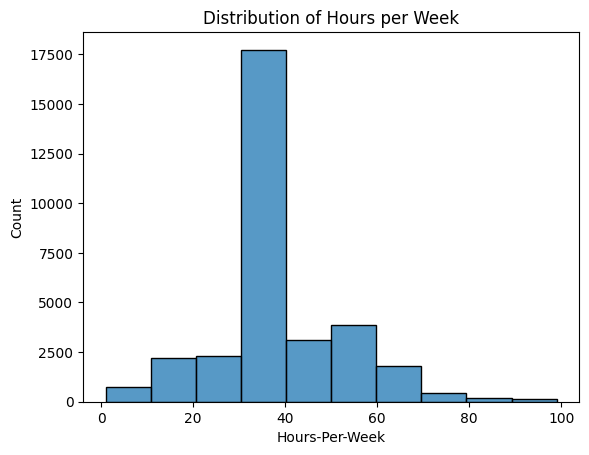

In [337]:
sns.histplot(df['Hours-Per-Week'], bins = 10)
plt.title("Distribution of Hours per Week")
plt.show()
#Working hours seems normal in this dataset i will just bin them

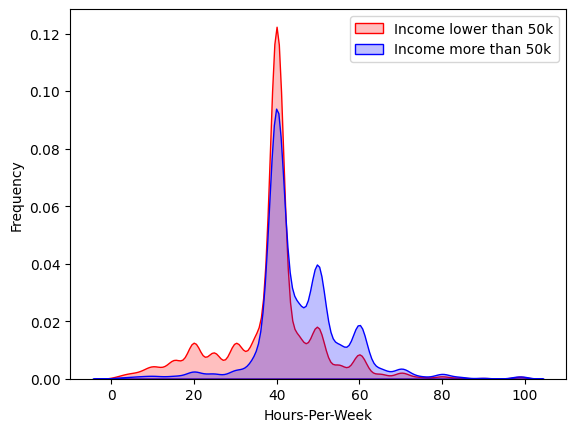

In [338]:
g = sns.kdeplot(df['Hours-Per-Week'][(df['Income']==0) & (df['Hours-Per-Week'].notnull())], color='Red', fill=True)
g = sns.kdeplot(df['Hours-Per-Week'][(df['Income']==1) & (df['Hours-Per-Week'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Hours-Per-Week')
g.set_ylabel('Frequency')
g = g.legend(['Income lower than 50k', 'Income more than 50k'])

#We can see that it's actually very healty because the more you work the more you get, 
# but at 40 hours of work there is a near chance of exceeding 50k or not.

In [339]:
bins = [0, 20, 30, 40, 50, 60, 100]  
labels = ['<20', '20–30', '30–40', '40–50', '50–60', '60+']  

df['Weekly-Hours-Binned'] = pd.cut(df['Hours-Per-Week'], bins=bins, labels=labels, right=False)
df.groupby('Weekly-Hours-Binned', as_index= False)['Income'].mean()
#It look good

C:\Users\zero_\AppData\Local\Temp\ipykernel_35928\1882452964.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Weekly-Hours-Binned', as_index= False)['Income'].mean()


,Weekly-Hours-Binned,Income
0,<20,0.068662
1,20–30,0.063963
2,30–40,0.127625
3,40–50,0.235766
4,50–60,0.445705
5,60+,0.406963


In [340]:
df.info()
#Now our dataset is ready to go to next stage, we will split the ddata 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  32561 non-null  int64   
 1   Workclass            30725 non-null  object  
 2   Education            32561 non-null  object  
 3   Education_Num        32561 non-null  int64   
 4   Marital_Status       32561 non-null  object  
 5   Ocupation            30718 non-null  object  
 6   Relationship         32561 non-null  object  
 7   Race                 32561 non-null  object  
 8   Sex                  32561 non-null  object  
 9   Hours-Per-Week       32561 non-null  int64   
 10  Native-Country       32561 non-null  object  
 11  Income               32561 non-null  int64   
 12  Age_Groups           32561 non-null  category
 13  Edu_Group            32561 non-null  object  
 14  Marital_Groupped     32561 non-null  object  
 15  Weekly-Hours-Binned

In [341]:
df.head()

,Age,Workclass,Education,Education_Num,Marital_Status,Ocupation,Relationship,Race,Sex,Hours-Per-Week,Native-Country,Income,Age_Groups,Edu_Group,Marital_Groupped,Weekly-Hours-Binned
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,US,0,Old Working Age,High_Edu,Alone,40–50
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,US,0,Old Working Age,High_Edu,Married-Together,<20
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,US,0,Old Working Age,Mid_Edu,Divorced,40–50
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,US,0,Old Working Age,Low_Edu,Married-Together,40–50
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Other,0,Young Working Age,High_Edu,Married-Together,40–50


In [342]:
#there are only missing walues on Workclass and Ocupation i will just use most frequent for the missing values 


In [343]:
ohe_cols = ['Workclass','Race','Sex','Native-Country','Ocupation','Relationship']
ode_cols = [ 'Marital_Groupped','Age_Groups','Edu_Group','Weekly-Hours-Binned']

In [344]:
X = df.drop(['Income'], axis = 1)
y = df['Income']

In [345]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,stratify= y,random_state= 22)


In [346]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22792 entries, 13288 to 8518
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  22792 non-null  int64   
 1   Workclass            21525 non-null  object  
 2   Education            22792 non-null  object  
 3   Education_Num        22792 non-null  int64   
 4   Marital_Status       22792 non-null  object  
 5   Ocupation            21518 non-null  object  
 6   Relationship         22792 non-null  object  
 7   Race                 22792 non-null  object  
 8   Sex                  22792 non-null  object  
 9   Hours-Per-Week       22792 non-null  int64   
 10  Native-Country       22792 non-null  object  
 11  Age_Groups           22792 non-null  category
 12  Edu_Group            22792 non-null  object  
 13  Marital_Groupped     22792 non-null  object  
 14  Weekly-Hours-Binned  22792 non-null  category
dtypes: category(2), int64

In [347]:
ordinal_pipeline = Pipeline(steps=
                            [
                            ('imputer', SimpleImputer(strategy='most_frequent')),
                            ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=  -1))
                            ])


In [348]:
ohe_pipeline = Pipeline(steps=
                            [
                            ('imputer', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))
                            ])

In [349]:
col_trans = ColumnTransformer(
    transformers=[
        ('ordinal_pipeline', ordinal_pipeline, ode_cols),
        ('ohe_pipeline', ohe_pipeline, ohe_cols),
        ('passthrough', 'passthrough', ['Age', 'Education_Num', 'Hours-Per-Week'])
    ]
    ,remainder='drop'
    ,n_jobs=-1
)

In [350]:
#Now i will start using six different machine learning models on this dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold

In [351]:
rfc = RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [100,200],
    'min_samples_split': [5,12], 
    'max_depth' : [8,15,20],
    'min_samples_leaf': [1,4],
    'criterion': ['gini', 'entropy']
}


In [ ]:
CV_rfc = GridSearchCV(estimator= rfc, param_grid=param_grid ,cv = StratifiedKFold(n_splits=5),n_jobs=-1)

In [ ]:
pipefinalRFC = make_pipeline(col_trans,CV_rfc)
pipefinalRFC.fit(X_train,y_train)

In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

In [355]:
knn = KNeighborsClassifier()

In [359]:
param_grid = {
    'n_neighbors': [3,5],
    'weights': ['uniform','distance'], 
    'algorithm' : ['auto','ball_tree','kd_tree'],
    'p': [1,2]
}

In [361]:
CV_knn = GridSearchCV(estimator= knn, param_grid=param_grid ,cv = StratifiedKFold(n_splits=5),n_jobs=-1)

In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

In [363]:
lr = LogisticRegression()

In [364]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [365]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [366]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

c:\Users\zero_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\zero_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ordinal_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Marital_Groupped',
                                                   'Age_Groups', 'Edu_Group',
                                                   'Weekly-Hours-Binned']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('im...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Workclass', 'Race', 'Sex',
                                                   'Native-Country',
                                                   'Ocupation',
                                                   'Relationship']),
                                                 ('passthrough', 'passthrough',
                                                  ['Age', 'Education_Num',
                                                   'Hours-Per-Week'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [367]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 10}
0.836433736373024
